Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python. 

1)Delivery_time -> Predict delivery time using sorting time

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
time_data=pd.read_csv("delivery_time.csv")
time_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Initial Investigation

In [3]:
time_data.shape

(21, 2)

In [4]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
time_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
time_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

# Data Processing

In [7]:
time_data=time_data.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},axis=1)
time_data

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Assumption Check

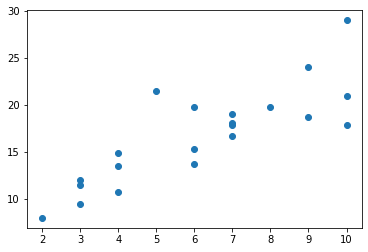

In [8]:
plt.scatter(x='Sorting_time',y='Delivery_time',data=time_data)

In [9]:
time_data.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


# Model building & Model Training

In [10]:
model=smf.ols("Delivery_time~Sorting_time",data=time_data).fit()

<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

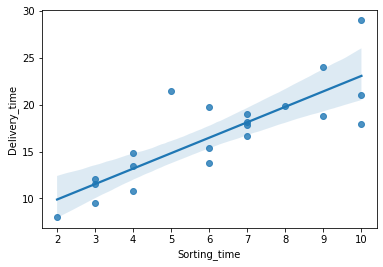

In [11]:
sns.regplot(x='Sorting_time',y='Delivery_time',data=time_data)

In [12]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [13]:
model.pvalues

Intercept       0.001147
Sorting_time    0.000004
dtype: float64

# Model Testing

Manual Calculation

In [14]:
#y=mx+c
#If x=5 then y=1.649020*5+6.582734
#            y=14.827

machine prediction

In [15]:
test_data=pd.DataFrame({'Sorting_time':[2,5,7]})
test_data

,Sorting_time
0,2
1,5
2,7


In [16]:
model.predict(test_data)

0     9.880774
1    14.827833
2    18.125873
dtype: float64

# Model Evaluation

In [17]:
print("R2 score is {}.".format(model.rsquared))
print("Mean Squared Error is {}.".format(model.mse_model))

R2 score is 0.6822714748417231.
Mean Squared Error is 351.43283843211566.


# Data Transformation-log transformation

In [18]:
X_log = np.log(time_data['Sorting_time'].values.reshape(-1,1))
X_log

array([[2.30258509],
       [1.38629436],
       [1.79175947],
       [2.19722458],
       [2.30258509],
       [1.79175947],
       [1.94591015],
       [1.09861229],
       [2.30258509],
       [2.19722458],
       [2.07944154],
       [1.38629436],
       [1.94591015],
       [1.09861229],
       [1.09861229],
       [1.38629436],
       [1.79175947],
       [1.94591015],
       [0.69314718],
       [1.94591015],
       [1.60943791]])

In [19]:
y_log =time_data['Delivery_time'].values.reshape(-1,1)
y_log

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

# Model Building

In [20]:
X_train_log,X_test_log,Y_train_log,Y_test_log=train_test_split(X_log,y_log,random_state=123,test_size=0.20)

# Model Training

Training data

In [21]:
log_linearmodel=LinearRegression()

In [24]:
log_linearmodel.fit(X_train_log,Y_train_log)

LinearRegression()

In [25]:
print("Intercept value of Log Model is",log_linearmodel.intercept_)
print("Co-efficient Value of Log Model is",log_linearmodel.coef_)

Intercept value of Log Model is [4.84459187]
Co-efficient Value of Log Model is [[6.70741116]]


# Model Testing

In [26]:
Ylog_train_pred=log_linearmodel.predict(X_train_log)
Ylog_train_pred

array([[16.86265934],
       [20.28897683],
       [15.63975369],
       [14.14303815],
       [12.2134362 ],
       [17.89661133],
       [20.28897683],
       [14.14303815],
       [17.89661133],
       [19.58228053],
       [14.14303815],
       [18.79226128],
       [17.89661133],
       [17.89661133],
       [16.86265934],
       [12.2134362 ]])

In [27]:
Ylog_test_pred=log_linearmodel.predict(X_test_log)
Ylog_test_pred

array([[20.28897683],
       [12.2134362 ],
       [16.86265934],
       [ 9.49381501],
       [19.58228053]])

# Model Evaluation

In [28]:
r2_score(Y_train_log,Ylog_train_pred)

0.5802496227698565

In [29]:
mean_squared_error(Y_train_log,Ylog_train_pred)

4.756860501558467

Testing data

In [30]:
r2_score(Y_test_log,Ylog_test_pred)

0.6776697647416989

In [31]:
mean_squared_error(Y_test_log,Ylog_test_pred)

21.456105508109967

# Data Transformation-sqrt transformation

In [32]:
X_sqrt = np.sqrt(time_data['Sorting_time'].values.reshape(-1,1))
X_sqrt

array([[3.16227766],
       [2.        ],
       [2.44948974],
       [3.        ],
       [3.16227766],
       [2.44948974],
       [2.64575131],
       [1.73205081],
       [3.16227766],
       [3.        ],
       [2.82842712],
       [2.        ],
       [2.64575131],
       [1.73205081],
       [1.73205081],
       [2.        ],
       [2.44948974],
       [2.64575131],
       [1.41421356],
       [2.64575131],
       [2.23606798]])

In [33]:
y_sqrt =time_data['Delivery_time'].values.reshape(-1,1)
y_sqrt

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

# Model Building

In [34]:
X_train_sqrt,X_test_sqrt,Y_train_sqrt,Y_test_sqrt=train_test_split(X_sqrt,y_sqrt,random_state=123,test_size=0.20)

# Model Training

In [35]:
sqrt_linearmodel=LinearRegression()

In [36]:
sqrt_linearmodel.fit(X_train_sqrt,Y_train_sqrt)

LinearRegression()

In [37]:
print("Intercept value of Sqrt Model is",sqrt_linearmodel.intercept_)
print("Co-efficient Value of Sqrt Model is",sqrt_linearmodel.coef_)

Intercept value of Sqrt Model is [3.12070377]
Co-efficient Value of Sqrt Model is [[5.51234234]]


# Model Testing

In [38]:
Ysqrt_train_pred=sqrt_linearmodel.predict(X_train_sqrt)
Ysqrt_train_pred

array([[16.62312978],
       [20.55226079],
       [15.44667595],
       [14.14538844],
       [12.66836076],
       [17.70499073],
       [20.55226079],
       [14.14538844],
       [17.70499073],
       [19.65773078],
       [14.14538844],
       [18.71196235],
       [17.70499073],
       [17.70499073],
       [16.62312978],
       [12.66836076]])

In [39]:
Ysqrt_test_pred=sqrt_linearmodel.predict(X_test_sqrt)
Ysqrt_test_pred

array([[20.55226079],
       [12.66836076],
       [16.62312978],
       [10.91633306],
       [19.65773078]])

# Model Evaluation
Training data

In [40]:
r2_score(Y_train_sqrt,Ysqrt_train_pred)

0.552460163508197

In [41]:
mean_squared_error(Y_train_sqrt,Ysqrt_train_pred)

5.071787153903029

Testing data

In [42]:
r2_score(Y_test_sqrt,Ysqrt_test_pred)

0.6683453086960739

In [43]:
mean_squared_error(Y_test_sqrt,Ysqrt_test_pred)

22.076793519460622

Model without any transformation- R2 score is 68.2%, Mean Squared Error is 351.43

Model with log transformation- Training Data- R2 score is 58%, Mean Squared Error is 4.756. Testing Data- R2 score is 67.7%, Mean Squared Error is 21.456.

Model with sqrt transformation- Training Data- R2 score is 55.2%, Mean Squared Error is 5.071. Testing Data-R2 score is 66.8%, Mean Squared Error is 22.